First you need to load all the necessary libraries for loading the data preprocessing and then making and validatation of the model


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


Load the data into training data and testing data from the keras datatsets

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(X_train,Y_train),(X_test,Y_test)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


training labels: [9 0 0 ... 3 0 5]


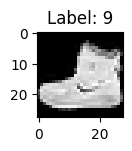

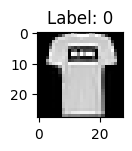

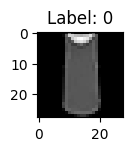

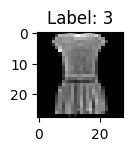

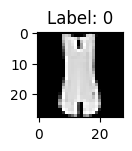

In [3]:

print("training labels:", Y_train)
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {Y_train[i]}")
    plt.show()

Now after loading the data normalization is required to force the system not to be biased against some inputs than other inputs

In [4]:
X_train=X_train/255.0
X_test=X_test/255.0

After the data normalization creation of the model will be the next step  to create the model import the model the layers and then the assign the data particularly the shape of the data
As this model only needs to have 2 hidden layer the number of neurons could be any but to compare the results with other models have the same number of nuerons and same other hyperparameters.

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
model_2=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


to summarize the model

In [6]:
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

After defining the model define how the model will be compiled at the time of training basically how the model will update its variables (to minimize loss).
Same as above dont change the hyperparameters in this to as we need to compare the results with other models and it could cloud the purpose if we change other hyperparameters

In [7]:
model_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Now after defining the model and compiling it need to train the model with the training data

In [8]:
import time
start=time.time()

epoch=10
ac=[]
loss=[]
e=[]
for i in range(epoch):
  model_2.fit(X_train,Y_train)
  l,a=model_2.evaluate(X_test,Y_test)
  ac.append(a)
  loss.append(l)
  e.append(i+1)
end=time.time()
time_taken=end-start
print("time taken=",time_taken)



1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7784 - loss: 0.6299
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8515 - loss: 0.4108
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8631 - loss: 0.3768
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8669 - loss: 0.3620
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8803 - loss: 0.3286
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8759 - loss: 0.3480
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8864 - loss: 0.3087
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8679 - loss: 0.3581
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8914 - loss: 0.2910
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8768 - loss: 0.3395
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8965 - loss: 0.2741
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8688 - loss: 0.3599
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9025 - loss: 0.2619
313/313 ━━

In [9]:
l,a=model_2.evaluate(X_test,Y_test)
print("loss=",l)
print("accuracy=",a)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8870 - loss: 0.3260
loss= 0.32672354578971863
accuracy= 0.8884000182151794


<ipython-input-11-630b8336597f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


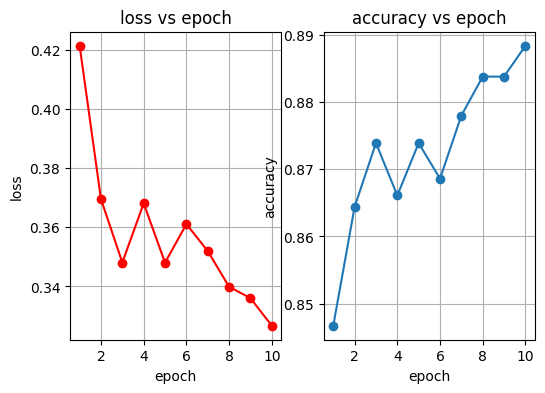

In [11]:
plt.figure(figsize=(6,4))
plt.title("Accuracy and Loss")

plt.subplot(1,2,1)
plt.title('loss vs epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.plot(e,loss,marker='o',color='red')
plt.subplot(1,2,2)
plt.title('accuracy vs epoch')
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(e,ac,marker='o')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


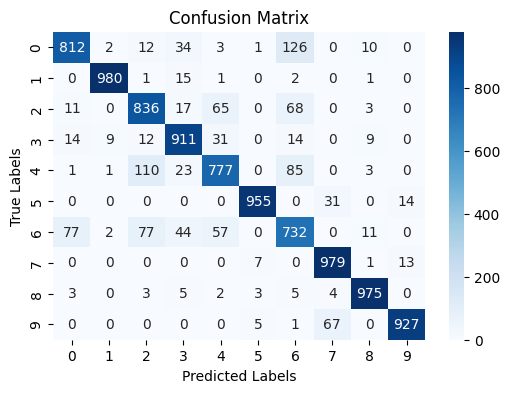

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred=model_2.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
cm=confusion_matrix(Y_test,y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()